In [18]:
import requests
import pandas as pd
import missingno as msno

In [3]:
# Your EIA API key
API_KEY = "hCjY4AAYMqVZvYwPppQ1XpeWhSRBgbFgB1ppzT5s"
BASE_URL = "https://api.eia.gov/v2"

# Example: Querying residential electricity consumption data
url = "https://api.eia.gov/v2/electricity/retail-sales/data/"
params = {
    "api_key": API_KEY,
    "frequency": "monthly",
    "data[]": ["customers", "price", "revenue", "sales"],
    "facets[sectorid][]": ["ALL", "COM", "IND", "OTH", "RES", "TRA"],
    "offset": 0,
    "length": 5000
}

response = requests.get(url, params=params)
data = response.json()

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data['response']['data'])
df.drop(['customers-units','price-units','revenue-units','sales-units'], axis=1, inplace=True)
df.to_csv("energy_data.csv", index=False)
res_df = df[df['sectorid'] == 'RES']
com_df = df[df['sectorid'] == 'COM']
ind_df = df[df['sectorid'] == 'IND']
tra_df = df[df['sectorid'] == 'TRA']
oth_df = df[df['sectorid'] == 'OTH']
all_df = df[df['sectorid'] == 'ALL']

1. Data Cleaning and Preprocessing


        Missing Values: Exploring the data to see if there are any missing values in any of the columns in data frame

In [13]:
# Check for missing values in the entire DataFrame
missing_values_na = df.isna()

# Count missing values per column
missing_count_na = df.isna().sum()


#print(missing_values_na)
print(missing_count_na)
print(df.shape[0])
print(df.shape[1])
print(df.dtypes)

period                0
stateid               0
stateDescription      0
sectorid              0
sectorName            0
customers           845
price               827
revenue             827
sales               827
dtype: int64
5000
9
period              object
stateid             object
stateDescription    object
sectorid            object
sectorName          object
customers           object
price               object
revenue             object
sales               object
dtype: object


In [15]:
### Converting the columns to correct datatypes
df['period'] = pd.to_datetime(df['period'], errors='coerce')
df['customers'] = pd.to_numeric(df['customers'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
### converting category columns to categories
df['stateid'] = df['stateid'].astype('category')
df['stateDescription'] = df['stateDescription'].astype('category')
df['sectorid'] = df['sectorid'].astype('category')
df['sectorName'] = df['sectorName'].astype('category')
print(df.head())


      period stateid stateDescription sectorid      sectorName  customers  \
0 2023-12-01      KY         Kentucky      TRA  transportation        0.0   
1 2023-12-01      LA        Louisiana      ALL     all sectors  2455701.0   
2 2023-12-01      LA        Louisiana      COM      commercial   299081.0   
3 2023-12-01      LA        Louisiana      IND      industrial    18191.0   
4 2023-12-01      LA        Louisiana      OTH           other        NaN   

   price    revenue       sales  
0   0.00    0.00000     0.00000  
1   8.69  614.41323  7074.35436  
2  10.75  182.77840  1700.61443  
3   5.84  185.34380  3175.74584  
4    NaN        NaN         NaN  


period                0
stateid               0
stateDescription      0
sectorid              0
sectorName            0
customers           845
price               827
revenue             827
sales               827
dtype: int64
period               0.00
stateid              0.00
stateDescription     0.00
sectorid             0.00
sectorName           0.00
customers           16.90
price               16.54
revenue             16.54
sales               16.54
dtype: float64


<Axes: >

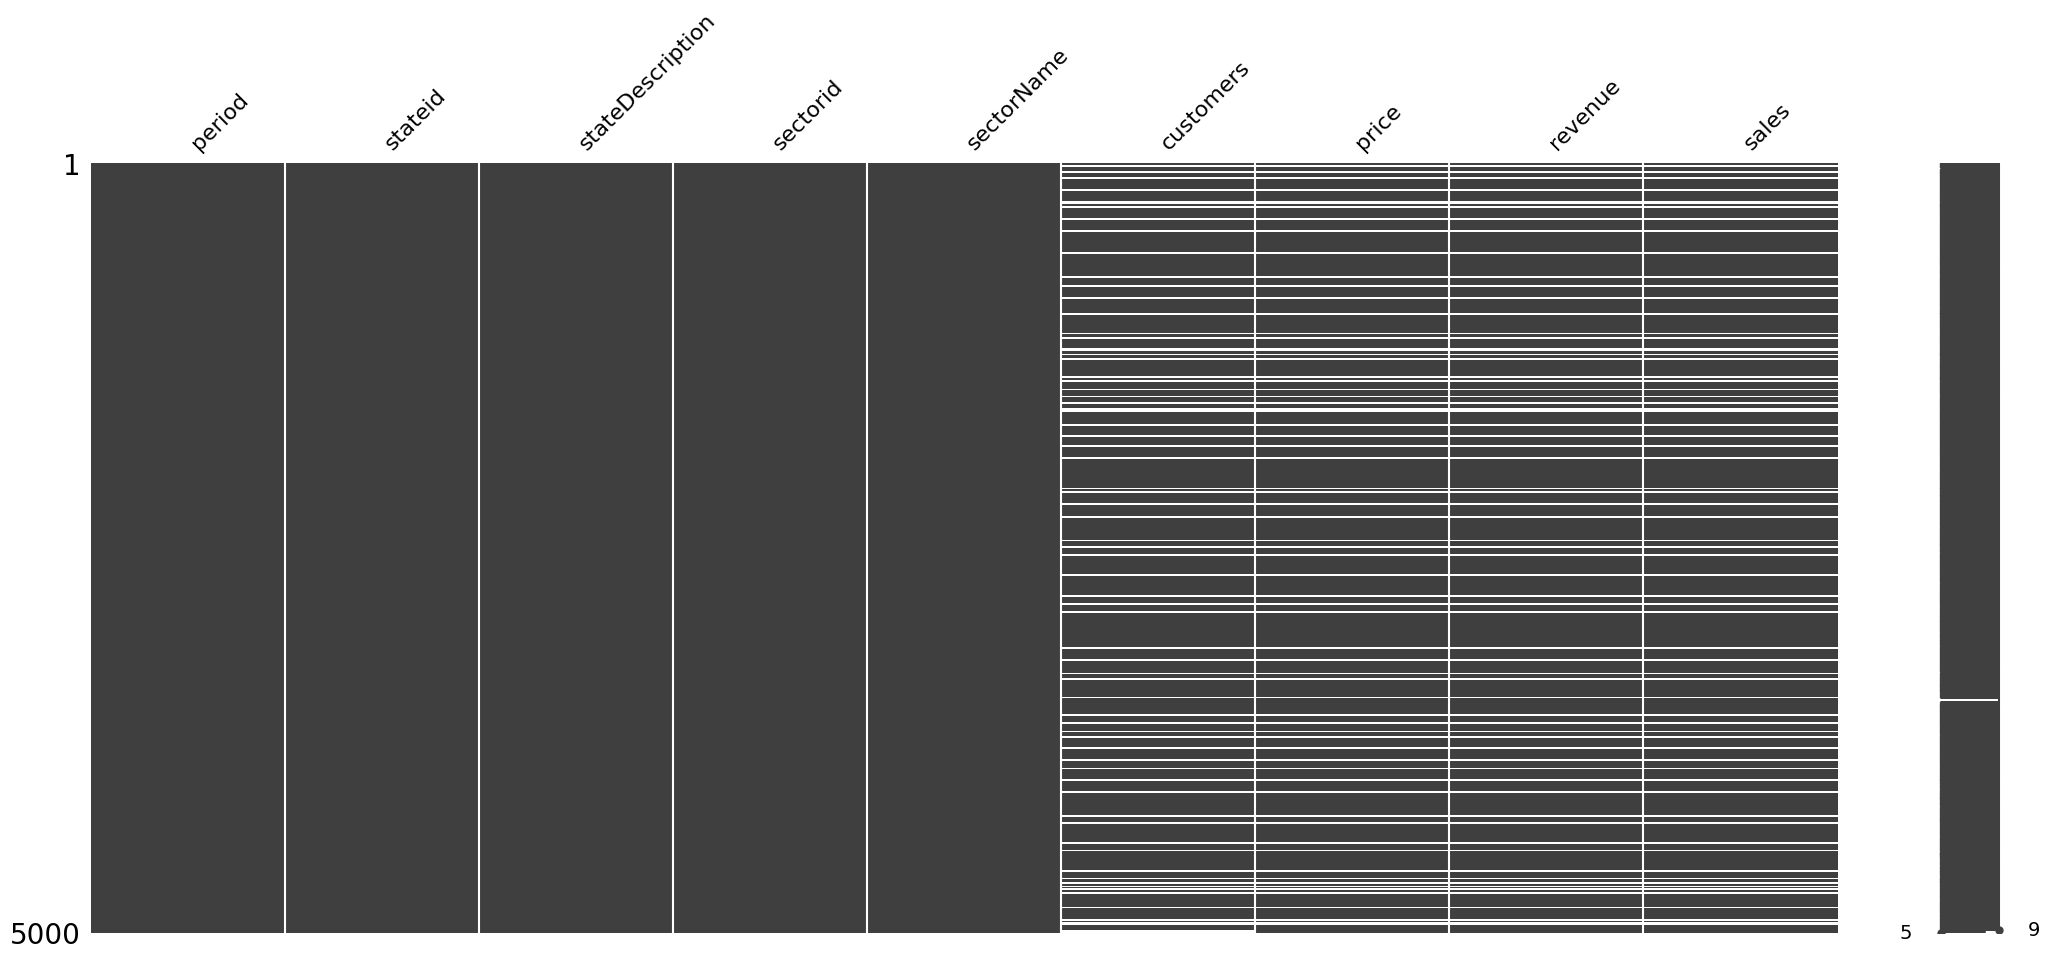

In [19]:
missing_values = df.isnull().sum()
print(missing_values)
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)
msno.matrix(df)


In [20]:
# Check missing values by stateid
state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())
print(state_missing)

# Check missing values by period
period_missing = df.groupby('period').apply(lambda x: x.isnull().sum())
print(period_missing)


         period  stateid  stateDescription  sectorid  sectorName  customers  \
stateid                                                                       
AK            0        0                 0         0           0         19   
AL            0        0                 0         0           0         21   
AR            0        0                 0         0           0         19   
AZ            0        0                 0         0           0         20   
CA            0        0                 0         0           0         16   
...         ...      ...               ...       ...         ...        ...   
WI            0        0                 0         0           0         12   
WNC           0        0                 0         0           0         13   
WSC           0        0                 0         0           0         15   
WV            0        0                 0         0           0         12   
WY            0        0                 0         0

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/2074237288.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())
/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/2074237288.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())
/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/2074237288.py:6: DeprecationWarning: DataFrameGr

In [21]:
missing_corr = df.isnull().astype(int).corr()
print(missing_corr)


                  period  stateid  stateDescription  sectorid  sectorName  \
period               NaN      NaN               NaN       NaN         NaN   
stateid              NaN      NaN               NaN       NaN         NaN   
stateDescription     NaN      NaN               NaN       NaN         NaN   
sectorid             NaN      NaN               NaN       NaN         NaN   
sectorName           NaN      NaN               NaN       NaN         NaN   
customers            NaN      NaN               NaN       NaN         NaN   
price                NaN      NaN               NaN       NaN         NaN   
revenue              NaN      NaN               NaN       NaN         NaN   
sales                NaN      NaN               NaN       NaN         NaN   

                  customers     price   revenue     sales  
period                  NaN       NaN       NaN       NaN  
stateid                 NaN       NaN       NaN       NaN  
stateDescription        NaN       NaN       NaN  

In [22]:
state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())
print(state_missing)

         period  stateid  stateDescription  sectorid  sectorName  customers  \
stateid                                                                       
AK            0        0                 0         0           0         19   
AL            0        0                 0         0           0         21   
AR            0        0                 0         0           0         19   
AZ            0        0                 0         0           0         20   
CA            0        0                 0         0           0         16   
...         ...      ...               ...       ...         ...        ...   
WI            0        0                 0         0           0         12   
WNC           0        0                 0         0           0         13   
WSC           0        0                 0         0           0         15   
WV            0        0                 0         0           0         12   
WY            0        0                 0         0

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/638311261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())
/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/638311261.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_missing = df.groupby('stateid').apply(lambda x: x.isnull().sum())


In [23]:
period_missing = df.groupby('period').apply(lambda x: x.isnull().sum())
print(period_missing)

            period  stateid  stateDescription  sectorid  sectorName  \
period                                                                
2007-07-01       0        0                 0         0           0   
2008-03-01       0        0                 0         0           0   
2008-04-01       0        0                 0         0           0   
2008-05-01       0        0                 0         0           0   
2008-06-01       0        0                 0         0           0   
2008-07-01       0        0                 0         0           0   
2008-08-01       0        0                 0         0           0   
2008-09-01       0        0                 0         0           0   
2008-10-01       0        0                 0         0           0   
2008-11-01       0        0                 0         0           0   
2008-12-01       0        0                 0         0           0   
2009-08-01       0        0                 0         0           0   
2009-0

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_57344/2051253266.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_missing = df.groupby('period').apply(lambda x: x.isnull().sum())


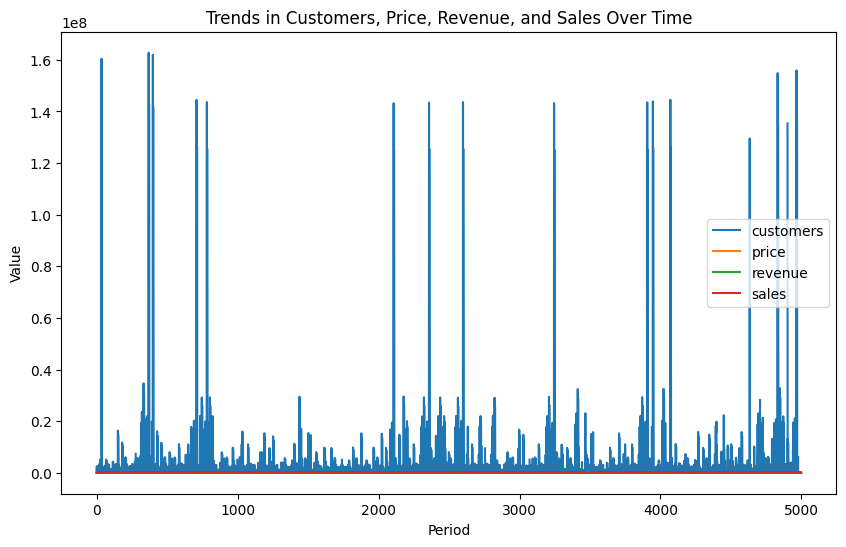

In [24]:
import matplotlib.pyplot as plt

# Plot all four variables over time
df[['customers', 'price', 'revenue', 'sales']].plot(figsize=(10,6))
plt.title('Trends in Customers, Price, Revenue, and Sales Over Time')
plt.xlabel('Period')
plt.ylabel('Value')
plt.show()

2. Exploratory Data Analysis (EDA)


3. Feature Engineering


4. Prediction Models


5. Advanced Explorations (optional)


6. Reporting and Insights
